<a href="https://colab.research.google.com/github/Valeriy1990/Neural_networks/blob/main/20_1_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

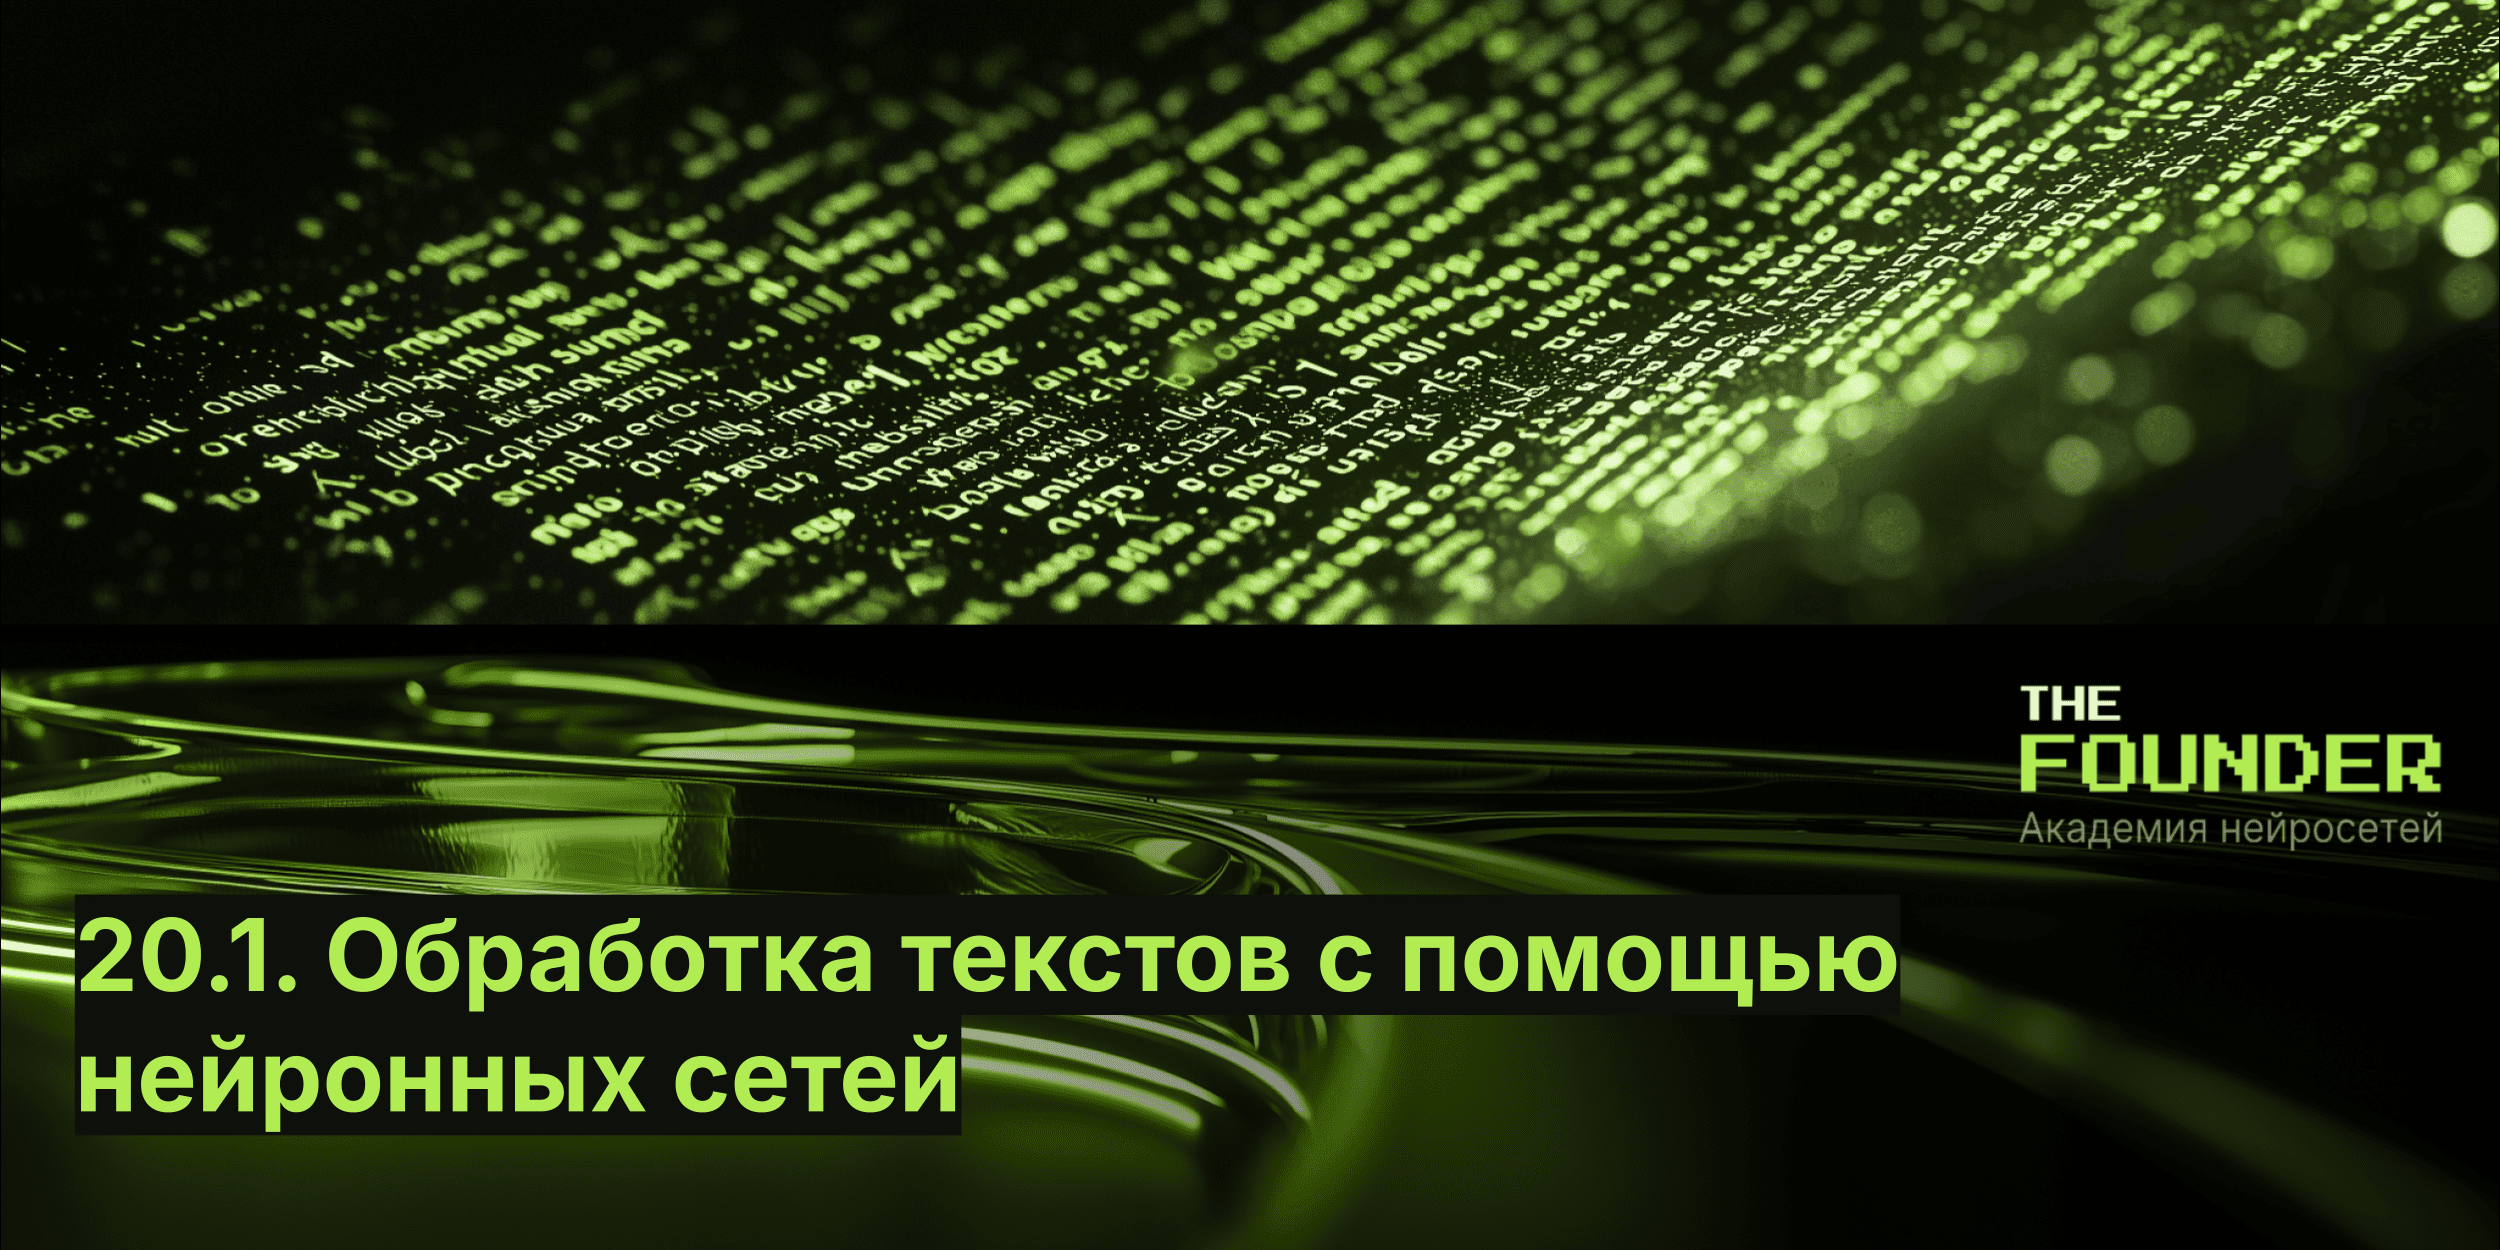

**Навигация по уроку**

1. Обработка текстов с помощью нейронных сетей
2. [Сравнение архитектур нейронных сетей для обработки текста](https://colab.research.google.com/drive/1KEFUgyBcqGaXGZEU-7MHENn5RH_AIvfH)
3. [Предварительно обученные векторные представления](https://colab.research.google.com/drive/1g_dX1XpRY--X6EjFflCC0717p9_9Y1SP)
4. [Домашняя работа](https://colab.research.google.com/drive/1t7rrJV4BSzFF8ZuiUQASkkq8ijzf0IiJ)

В данном уроке мы исследуем модели глубокого обучения, которые используются для обработки текста, временных последовательностей и последовательностей данных в целом. В данном контексте под текстом мы будем понимать последовательность слов или символов.

Фундаментальными алгоритмами глубокого обучения для обработки последовательностей являются рекуррентные нейронные сети и одномерные сверточные
нейронные сети, которые являются одномерной версией двумерных сверточных нейронных сетей, которые мы использовали в задачах компьютерного зрения.

С помощью этих двух алгоритмов можно решать различные задачи машинного обучения:

* классификация документов с целью идентификации темы статьи или автора книги;
* анализ эмоциональной окраски для классификации отзывов на услугу, постов в социальных сетях или отзывов к фильмам на положительные и отрицательные;
* сравнение временных последовательностей для оценки "схожести" (по научному, корреляции) между двумя документами или двумя биржевыми котировками;
* преобразование «последовательности в последовательность» (seq2seq), что используется для задач машинного перевода с одного языка на другой;
* прогнозирование временных последовательностей для предсказания погоды в определенном месте на основе предыдущих метеорологических данных.



## Обработка текстовых данных

Текст — одна из самых распространенных форм последовательностей данных. Его
можно интерпретировать и как последовательность символов, и как последовательность слов, но чаще текст обрабатывается на уровне слов.

Модели глубокого обучения для обработки последовательностей, которые мы рассмотрим в текущем уроке, могут на основе текста формировать понимание естественного языка в простейшей форме, достаточной для таких применений, как классификация документов, анализ эмоциональной окраски, идентификация автора и даже получение ответов на вопросы в ограниченном контексте. Конечно, нужно помнить, что ни одна из этих моделей в действительности не понимает текст в человеческом смысле, а лишь отражают статистическую структуру письменного языка — этого достаточно для решения многих простых задач обработки текста.

>Глубокое обучение для обработки естественного языка — это распознавание образов для слов, предложений и абзацев, примерно так же, как компьютерное зрение — это распознавание образов для пикселей.

Как любые другие нейронные сети, модели глубокого обучения не могут принимать
на входе простой текст — они работают только с числовыми тензорами.

**Векторизация текста** — это процесс преобразования текста в числовые тензоры.

Ее можно выполнить несколькими способами:
* разбить текст на слова и преобразовать каждое слово в вектор;
* разбить текст на символы и преобразовать каждый символ в вектор;
* извлечь N-граммы из слов или символов и преобразовать каждую N-грамму
в вектор.

> **N-граммы слов или символов** — это перекрывающиеся группы из N последовательных слов или символов.

Извлечение N-грамм — это своеобразная форма конструирования признаков. Одномерные и рекуррентные нейронные сети, которые мы изучим на этом уроке, способны самостоятельно получать представления для групп слов и символов без явного определения таких групп, просматривая последовательности слов или символов. По этой причине мы больше не будем касаться n-грамм. Тем более токенизатор Keras их не поддерживает. Однако стоит отметить, что N-граммы зарекомендовали себя в конструирования признаков в задачах классического машинного обучения при использовании легковесных, поверхностных моделей обработки текста, таких как логистическая регрессия и случайные леса, а также в случаях когда у вас "небольшой" набор данных и сети сложно выделить на нем самостоятельно признаки.




### Предварительная очистка

Прежде чем текст подготовить к формату подходящему для обучению вашей модели, его необходимо обработать и сформировать из него датасет.

Во время обработки текста над ним выполняют, как правило, следующие преобразования:
* **Нормализация**. Убирает заглавные буквы.
* **Очистка**. Удаляет нетекстовые элементы, такие как знаки препинания и цифры.
* **Лексический анализ**. Разделение предложения на отдельные слова.
* **Удаление стоп-слов**. Удаление распространенных неинформативных слов, которые не привносят смысла в предложение.
* **Морфологический поиск**. Сокращение слова до его основы (до неизменяемой части слова). Такой алгоритм называется стеммингом.
* **Лемматизация**. Преобразование слова в словарную форму (лемму). Это альтернатива морфологическому поиску, но она сложнее, поскольку используется не алгоритм, а словарь.
* **Частеречная разметка**. Помечает каждое слово во фразе его грамматической ролью в предложении (например, как глагол или как существительное).
* **n-грамма**. Связывает каждое слово с определенным количеством
следующих слов и рассматривает их как уникальный набор. Лучше всего в целях анализа обычно работают биграммы (серия из двух смежных элементов или токенов) и триграммы (серия из трех смежных элементов или токенов).

Единственным обязательным преобразованием является лексический анализ!

Хорошая новость! При работе с глубоким обучением при большом количестве примеров вам нужны только базовые преобразования: нормализация, очистка и лексический анализ. Слои глубокого обучения могут определять, какую информацию извлекать и обрабатывать.

При работе с ограниченным числом примеров необходимо обеспечить как можно больше обработки текста (сконструировать признаки вручную), чтобы помочь сети глубокого обучения определить, что делать, несмотря на небольшое количество данных.

> Keras предлагает функцию `keras.preprocessing.text.Tokenizer`,
способную нормализовать (параметр `lower` в значении `True`), лексически
анализировать и очищать. Для очистки необходимо задать параметр `filters`, который содержит строку удаляемых символов, обычно это:
 ```
 !"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff
 ```



### Токенизация

Единицы, на которые можно разбить текст (слова, символы или N-граммы), называют **токенами**, а разбиение текста на такие токены называют **токенизацией**.


В русском алфавите содержится 33 буквы, каждый символ уникальный и каждому можно сопоставить цифру (индекс) от 0 до 32:


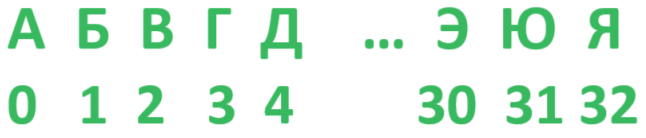

Теперь мы можем писать целые предложения используя индексы букв. По такому принципу работают таблицы кодировок. Если вы посмотрите на клавиатуру компьютера или ноутбука, то каждая клавиша будет иметь код в таблице ASCII:

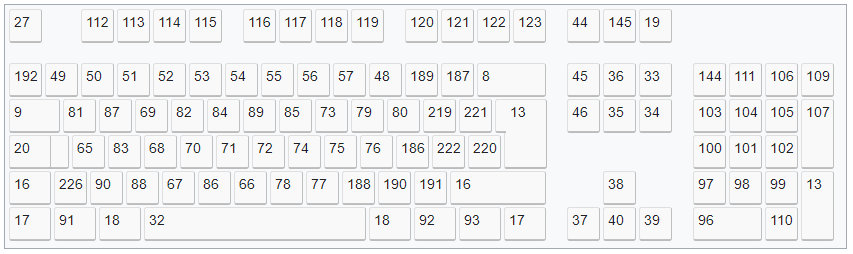

> ASCII (англ. American standard code for information interchange) — стандарт кодирования знаков латинского алфавита, цифр, некоторых специальных знаков и управляющих последовательностей, принятый в 1963 году Американской ассоциацией стандартов как основной способ представления текстовых данных в ЭВМ.


Если мы смотрим на большой текст как на набор букв, то каждая буква для нас "на вес золота", мы не можем выделить более нужную букву, поэтому должны анализировать каждый символ. Однако, если мы посмотрим на текст как на набор слов, то можем встретить слова, которые не несут никакой смысловой нагрузки. Это либо мусорные слова, либо редко употребляемые, либо слова с ошибками в написании.

Сразу возникает вопрос, но как эти слова проиндексировать?

Проще простого! Надо создать словарь заданной длины, например, 10 тыс. слов и поместить в него уникальные слова в порядке их употребляемости. Самое употребляемое слово вначале, редкое в конце, а все что "вываливается" за пределы словаря, то это редкоупотребляемые слова. Их все можно пометить одним числом. Что подскажет нашей нейронке, что встретилось какое-то редко употребляемое слово, которое не несет никакой смысловой нагрузки.


Библиотека Keras содержит метод `tokenizer()`, который принимает на вход текст, а возвращает словарь частотности (множество пар слово - частота повторений), расположит все полученные значения в обратном порядке. Самые частые слова текста, как правило союзы, частицы, предлоги и местоимения займут место в начале списка индексов, а самые редкие окажутся в конце.

Приведем конкретный пример токенизации в Keras. Возьмем отрывок стихотворения Александра Сергеевича Пушкина и посмотрим как его Keras превратит в токены:

In [ ]:
import numpy as np
texts = [
    "Мороз и солнце; день чудесный!",
    "Еще ты дремлешь, друг прелестный -",
    "Пора, красавица, проснись:",
    "Открой сомкнуты негой взоры",
    "Навстречу северной Авроры,",
    "Звездою севера явись!"
    ]

Используя генератор для последовательного преобразования, сначала разбиваем текст на фразы (`for phrase in texts`), потом расщепляем фразы на слова (`for word in phrase.split (" ")`), затем каждое слово приводим к нижниму регистру (`word.lower()`). После преобразованием результата в множество (`set()`) получаем набор уникальных слов.

In [ ]:
unique_words = set(word.lower() for phrase in texts for word in phrase.split (" "))
print (f"Стихотворение содежит { len(unique_words)} уникальных слова")

Стихотворение содежит 24 уникальных слова


Стихотворение содержит 24 слова. Теперь мы можем подставить в Tokenizer размер словаря (`vocabulary_size`). Использование слишком маленького значения `vocabulary_size` может привести к исключению важных слов из процесса обучения.
Слишком большой словарь может бесполезно занять память компьютера. Вам необходимо предоставить функции Tokenizer правильную оценку количества отдельных слов, содержащихся в списке текстов. Скоро мы увидим, а пока должны принять на веру, что размер словаря мы всегда берем на 1 больше, чтобы зарезервировать место для символа начала фразы.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocabulary_size = len(unique_words) + 1
tokenizer = Tokenizer( num_words=vocabulary_size )

Обучим токенайзер на нашем тексте и выведем индексы слов:

In [ ]:
tokenizer.fit_on_texts(texts)
print(tokenizer.index_word)

{1: 'мороз', 2: 'и', 3: 'солнце', 4: 'день', 5: 'чудесный', 6: 'еще', 7: 'ты', 8: 'дремлешь', 9: 'друг', 10: 'прелестный', 11: 'пора', 12: 'красавица', 13: 'проснись', 14: 'открой', 15: 'сомкнуты', 16: 'негой', 17: 'взоры', 18: 'навстречу', 19: 'северной', 20: 'авроры', 21: 'звездою', 22: 'севера', 23: 'явись'}


Таким образом мы сформировали словарь частотности и получили последовательность индексов. Однако диапазон значений последовательности очень широк. Если мы передадим в таком виде числа, то их значения будут в очень широком диапазоне `vocabulary_size`. А мы знаем, что нейронные сети не любят большие числа, а тем более их разбросы в таком большом диапазоне. На ум приходит нормализация данных, т.е. приведение к такому виду индексов, чтобы разница между значениями была мала. Рассмотрим 2 самых популярных способа Bag Of Words и Embedding.

### Bag of Words (мешок слов)

Данный метод можно проиллюстрировать следующим образом:

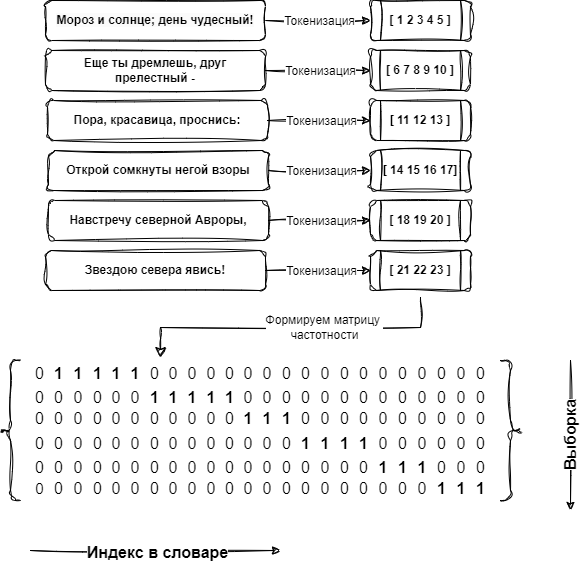

Полученная матрица состоит из 25 столбцов (24 слова плюс указатель начала фразы c индексом 0) и 6 строк, представляющих строки стихотворения (выборки). У токенайзера есть готовый метод `texts_to_matrix` для такого преобразования:

In [ ]:
print(tokenizer.texts_to_matrix(texts,  mode='count')) # режим 'count' - число повторений индекса (доступные режимы: binary, count, freq, tfidf)

[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  0.]]



Числа внутри матрицы представляют количество раз, когда слово встречается во фразе. Но это не единственное возможное представление. Вот другие:

* **Частотное кодирование**. Сколько раз слово встречается во фразе.
* **Унитарное кодирование**. Отмечает наличие слова во фразе, независимо от того, сколько раз оно встретилось (значения в матрице только 0 и 1).
* **Частота термина** - инверсная частота в документе (Term Frequency-lnverse Document Frequency -TF-IDF). Кодирует меру количества вхождений слова в документе относительно общего количества слов в матрице. Слова с высокими оценками более характерны, а слова с низкими оценками менее информативны.

Вы можете напрямую использовать трансформацию TF-IDF из Keras. Метод `text_to_matrix` поддерживает TF-IDF, достаточно указать `mode='tfidf'` в качестве параметра:


In [ ]:
print(tokenizer.texts_to_matrix(texts, mode= 'tfidf'))

[[0.         1.38629436 1.38629436 1.38629436 1.38629436 1.38629436
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.38629436 1.38629436 1.38629436 1.38629436 1.38629436 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.38629436
  1.38629436 1.38629436 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.38629436 1.38629436 1.38629436 1.38629436
  0.         0.         0.        

Обратите внимание, что, используя матричное представление, независимо от того, используете ли вы двоичный, частотный или более сложный подсчет TF-IDF, вы теряете смысл словосочетания, существующий во фразе. Во время обработки слова разбросаны по разным столбцам, и нейронная сеть не может угадать порядок слов во фразе. Именно из-за отсутствия порядка такой подход называется набором слов или мешком слов (bag of words). Его относят к методам прямого кодирования.

Подход набора слов используется во многих алгоритмах машинного обучения, с результатами, зачастую варьирующимися от хорошего до удовлетворительного. Основное достоинство метода - его простота и с ним можно использовать простую полносвязанную (плотные слои) архитектуру.




### Векторное представление слов (Word Embeddings)

Другим популярным и мощным способом связывания вектора со словом является
использование плотных векторов слов, или векторного представления слов (word
embeddings). В отличие от векторов, полученных "мешком слов" (относится к методам прямого кодирования), — бинарных (в практике чаще используют унитарное кодирование), разреженных (почти полностью состоящих из нулей) и с большой размерностью (их размерность совпадает с количеством слов в словаре) — векторные представления слов являются малоразмерными векторами вещественных чисел (то есть плотными векторами, в противоположность разреженным), как показано на рис. 1.

В отличие от векторов, полученных прямым кодированием, векторные представления слов конструируются из данных. При работе с огромными словарями размерность векторов слов нередко может достигать 256, 512 или 1024. С другой стороны, прямое кодирование слов обычно влечет за собой создание векторов с числом измерений 20 000 или больше (при использовании словаря с 20 000 токенов). Иначе говоря, векторное представление слов позволяет уместить больший объем информации в меньшее число измерений.


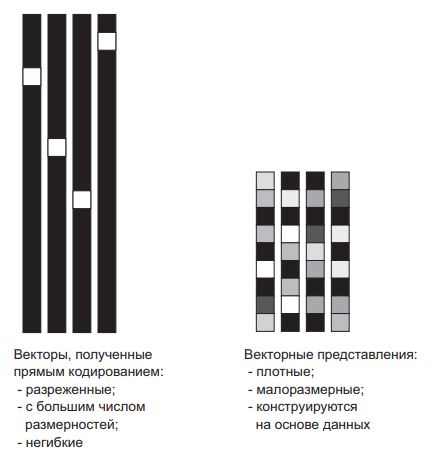

Рис. 1. Представления слов, полученные Bag of Words, являются разреженными, негибкими и имеют большое число размерностей, тогда как векторные представления — плотные, относительно малоразмерные и конструируются на основе данных

Получить векторные представления слов можно двумя способами:
* Конструировать векторные представления в процессе решения основной задачи
(такой, как классификация документа или определение эмоциональной окраски). В этом случае изначально создаются случайные векторы слов, которые
затем постепенно конструируются (обучаются), как это происходит с весами
нейронной сети.
* Загрузить в модель векторные представления, полученные с использованием
другой задачи машинного обучения, отличной от решаемой. Такие представления называют предварительно обученными векторными представлениями слов.


Процесс векторного представления слов не происходит случайным образом, он разработан так, что слова получают одинаковые значения, если они имеют одинаковый смысл или находятся в одинаковых темах. Другими словами, это сложное
сопоставление. Каждый столбец - это специальная карта (или шкала), на которой связанные слова оказываются рядом друг с другом. Под связанными словами подразумевается, что слова являются синонимами или относятся к похожему понятию.
То есть обладают семантическим сходством (semantic similarity). Поскольку одно и то же семантическое значение может встречаться в разных языках, то можно использовать тщательно выстроенные векторные представления для помощи в переводе с одного языка на другой: слово на одном языке будет иметь те же оценки векторного представления, что и то же слово на другом языке.

Векторные представления слова превращает слово в серию чисел, представляющих его положение в самом векторном представлении. Эта серия чисел - вектор слов (word vector). Обычно он состоит из порядка 300 векторов
(количество векторов, которые Google использовал в своей модели, обученной на наборе новостей Google), и нейронные сети используют его для более
качественной и эффективной обработки текстовой информации. Фактически,
слова со схожим значением, или используемые в сходных контекстах, имеют
похожие векторы слов. Следовательно, нейронные сети могут легко обнаружить слова с аналогичным значением. Кроме того, манипулируя векторами
нейронные сети способны работать с аналогиями, а значит, вы можете получить удивительные результаты, такие как:

* король - мужчина + женщина = королева
* Париж - Франция + Польша = Варшава

Это может показаться магией, но на самом деле - простая математика. Вы
можете увидеть, как все работает, посмотрев на следующий рисунок, представляющий два вектора Word2vec (предобученные Embedding).

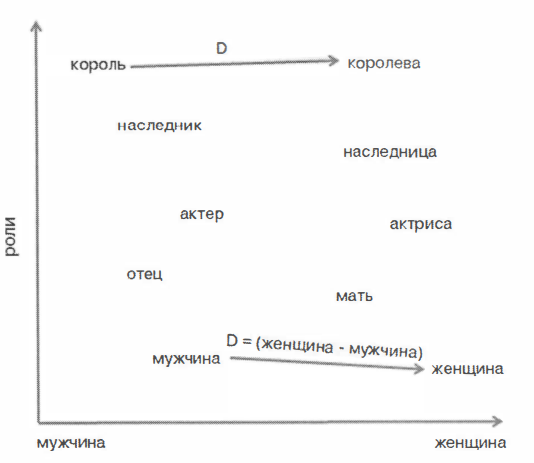

Каждый вектор в Word2vec представляет различную семантику. Это может быть
вид пищи, качество человека, национальность или пол. Существует множество
типов семантики, и они не определены заранее. В процессе обучения на большом объеме данных векторное представление создало их автоматически на основе представленных примеров.

На рисунке показаны два вектора из Word2vec: один представляет качество человека, а другой - его пол. Первый вектор определяет роли, начиная
с короля и королевы, обладающих наиболее высокими оценками, проходит
через актера и актрису и, наконец, завершается мужчиной и женщиной с более
низкими оценками. Если добавить этот вектор к вектору пола, вы увидите, что
мужской и женский варианты различаются оценками в этом векторе. Теперь, когда вы вычитаете из короля мужчину и добавляете женщину, вы просто переходите от координат короля и перемещаетесь вдоль вектора пола, пока не достигнете координат королевы. Этот простой прием координат Word2vec не подразумевает какого-либо понимания слов, и возможен потому, что все векторы векторного представления слов синхронизированы, представляя значения слов, и вы можете осмысленно переходить от одной координаты к другой, когда понятия в рассуждениях меняются.

### Конструирование векторных представлений слов с помощью слоя Embedding

Существует ли идеальное векторное пространство слов, точно отражающее человеческий язык, которое можно было бы использовать для решения любых задач
обработки естественного языка? Возможно. Однако надо определиться, что есть человеческий язык. Ведь есть много разных языков, и они не изоморфны, потому что каждый язык является отражением конкретной культуры и контекста.

Пригодность векторного пространства слов для практического применения в значительной степени зависит от конкретной задачи: идеальное векторное пространство слов для англоязычной модели анализа эмоциональной окраски отзывов к фильмам может отличаться от идеального векторного пространства для англоязычной модели классификации юридических документов, потому что важность определенных семантических отношений различна для разных задач.

Как следствие, представляется разумным обучать новое векторное пространство
слов для каждой новой задачи. К счастью, прием обратного распространения ошибки помогает легко добиться этого, а Keras еще больше упрощает реализацию. Речь
идет об обучении весов слоя: в данном случае слоя `Embedding`.

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(
    1000, # количество возможных токенов (размер словаря)
    64    # размерность пространства
)


Слой `Embedding` лучше всего воспринимать как словарь, отображающий целочисленные индексы (обозначающие конкретные слова) в плотные векторы. Он принимает целые числа на входе, отыскивает их во внутреннем словаре и возвращает
соответствующие векторы. Это эффективная операция поиска в словаре:

$$
\text{Индекс слова} ⇒ \text{Слой Embedding} ⇒ \text{Вектор, соответствующий слову}
$$

Слой `Embedding` получает на входе двумерный тензор с целыми числами и с формой
`(образцы, длина_последовательности)`, каждый элемент которого является последовательностью целых чисел. Он может работать с последовательностями разной
длины. однако, все последовательности в пакете должны иметь одинаковую длину, потому что упаковываются в один тензор. Чтобы условие выполнялось, необходимо короткие последовательности  дополнить нулями, а длинные — усечь.

При создании слоя Embedding, его веса (внутренний словарь векторов токенов) инициализируются случайными значениями, как в случае с любым другим слоем. В процессе обучения векторы слов постепенно корректируются посредством обратного
распространения ошибки, и пространство превращается в структурированную модель,
пригодную к использованию. После полного обучения пространство векторов приобретет законченную структуру, специализированную под решение конкретной задачи.



## Задача об отзывах на фильмы

Используем идею обучения пространства векторов для решения задачи определения эмоциональной окраски отзывов к фильмам в IMDB, которую мы уже решали в уроке 17.2.

Вспомним, как мы раньше решали эту задачу.

Сначала мы импортировали датасет:

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

А после вызывали встроенный словарь индексов:

In [ ]:
# Получение словаря
word_index = imdb.get_word_index()
print(word_index)

{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zaniacs': 52130, '275': 34706, 'consenting': 27631, 'snuggled': 408

А дальше мы делали процедуру векторизации, которую мы называли прямым кодированием. Как мы уже говорили Bag of Words относиться к методам прямого кодирования. Векторизуя данные, мы провели процедуру, известную нам, как `one-hot encoding`, а получили результат, соответствующий "мешку слов".

In [ ]:
# Пример из урока 17.2

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Создаем нулевой вектор с размерностью 10000!
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Записываем единицы в элемент с данным индексом
    return results

x_train = vectorize_sequences(train_data) # Векторизуем обучающие данные
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


Теперь решим эту задачу используя слой `Embedding`.

Начнем с подготовки исходных данных. Ограничимся набором из 10 000 слов, наиболее часто встречающихся в отзывах к фильмам (так же, как мы делали это в первый раз), и выберем из каждого отзыва только первые 20 слов. Сеть будет обучать 8-мерные векторные представления, по 10 000 слов в каждом, преобразовывать входные последовательности целых чисел (двумерный тензор с целыми числами) в векторные последовательности (трехмерный тензор с вещественными числами), преобразовывать трехмерный тензор в двумерный и обучать единственный верхний слой Dense, предназначенный для классификации.

### Загрузка датасета

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # Количество слов, рассматриваемых как признаки
max_len = 20          # Обрезка текста после этого количества слов (в числе max_features самых распространенных слов)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # Загрузка данных как списков целых чисел

Посмотрим на данные датасета:

In [ ]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Как мы видим, датасет уже содержит данные в виде целых чисел, что упрощает нам задачу.

In [ ]:
# Преобразование списков целых чисел в двумерный тензор с целыми числами и с формой '(образцы, максимальная длина)'
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

С помощью `pad_sequences` мы обрезаем или дополняем нулями каждую строчку двухмерного тензора до длины `max_len` (20 токенов):

In [ ]:
print(x_train[0])

[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]


### Определение архитектуры НС

Будем решать задачу бинарной классификации, а это значит:
* Последний выходной слой с одним нейроном;
* Рекомендуемая функция активации на выходном слое - `sigmoid`;
* Функция потерь - бинарная кросс-энтропия;
* Оптимизатор Adam или rmsprop с параметрами по умолчанию.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
model = Sequential()
model.add(Embedding(10000, 8, input_length=max_len))
model.add(Flatten()) # После эмбединга необходимо сгладить данные
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Обучение модели

Модель простая (всего 80161 параметр), легко и быстро обучается, быстро переходит в режим переобучения. Поэтому желательно обучать на небольшом числе эпох (15 достаточно) и относительно больших пакетах (128 образцов в пакете).

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
157/157 [==============================] - 12s 51ms/step - loss: 0.6853 - acc: 0.5878 - val_loss: 0.6728 - val_acc: 0.6550
Epoch 2/15
157/157 [==============================] - 3s 19ms/step - loss: 0.6390 - acc: 0.7182 - val_loss: 0.6160 - val_acc: 0.6978
Epoch 3/15
157/157 [==============================] - 3s 20ms/step - loss: 0.5668 - acc: 0.7513 - val_loss: 0.5601 - val_acc: 0.7198
Epoch 4/15
157/157 [==============================] - 3s 19ms/step - loss: 0.5063 - acc: 0.7752 - val_loss: 0.5262 - val_acc: 0.7368
Epoch 5/15
157/157 [==============================] - 1s 6ms/step - loss: 0.4636 - acc: 0.7950 - val_loss: 0.5072 - val_acc: 0.7450
Epoch 6/15
157/157 [==============================] - 1s 7ms/step - loss: 0.4329 - acc: 0.8084 - val_loss: 0.4972 - val_acc: 0.7508
Epoch 7/15
157/157 [==============================] - 1s 5ms/step - loss: 0.4086 - acc: 0.8221 - val_loss: 0.4928 - val_acc: 0.7540
Epoch 8/15
157/157 [==============================] - 1s 7ms/step - los

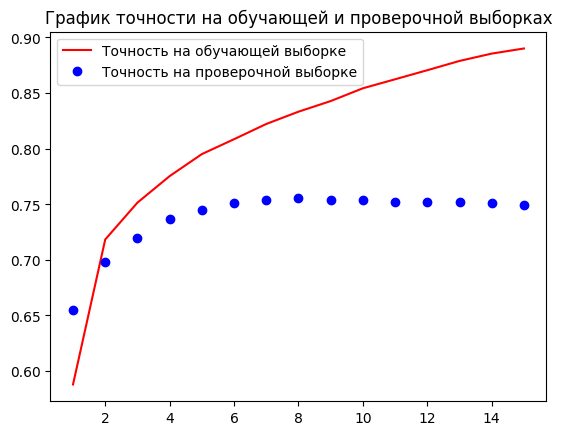

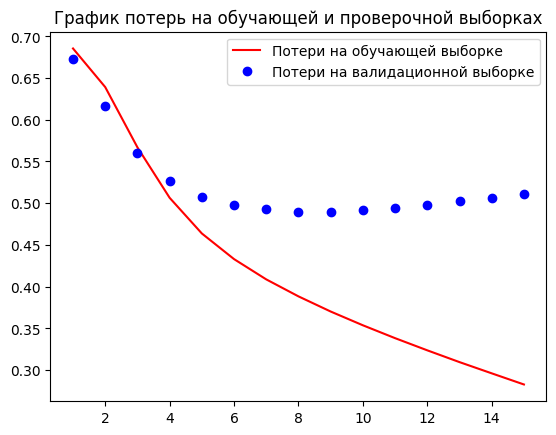

In [ ]:
# Отрисовка графиков
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc, 'bo', label='Точность на проверочной выборке')
plt.title('График точности на обучающей и проверочной выборках')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss, 'bo', label='Потери на валидационной выборке')
plt.title('График потерь на обучающей и проверочной выборках')
plt.legend()
plt.show()

На проверочных данных мы получили точность ~76%. Это очень хорошо, если учесть, что мы исследовали только первые 20 слов из каждого отзыва. Однако обратите внимание на то, что в результате простого сокращения размерности векторных
последовательностей и обучения единственного слоя Dense получается модель,
которая отдельно интерпретирует каждое слово во входной последовательности,
не учитывая связей между словами и структуры предложений. Лучший результат можно получить, если добавить рекуррентные или одномерные сверточные слои поверх векторных последовательностей для извлечения признаков, которые учитывают целые последовательности слов. Об этом мы поговорим на следующем уроке.



А сейчас давайте перейдем к следующей [практической части урока](https://colab.research.google.com/drive/1KEFUgyBcqGaXGZEU-7MHENn5RH_AIvfH), где применим полученные навыки по обработке текста на примере датасета "русской литературы" и обучим модель угадывать автора по отрывкам произведений.